In [1]:
%load_ext autoreload
%autoreload 2
!pwd
import os
import sys 
if os.path.abspath("../../../") not in sys.path:
    sys.path.append(os.path.abspath("../../../")) 

import os
# import networkx as nx
from rwtools.nemesis.latency_map.create_latency_map import *
from rwtools.nemesis.graph.nemesis_node import AbstractNemesisNode
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from rwtools.nemesis.graph.control_flow_graph import ControlFlowGraph



/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/evaluation_notebooks


# Load list of branching instructions
In the form of instruction addresses 


In [2]:
import json 

test_name = "multifork"

input_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}")
output_assembly = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw.s")
output_binary = os.path.abspath(f"../test_programs/{test_name}/{test_name}_rw")
test_values = os.path.abspath(f"../test_programs/{test_name}/test_inputs.txt")

# instrument each function seperately 
First instrument the code, then dump the rewritten program, then compile into new binary using gcc 

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8


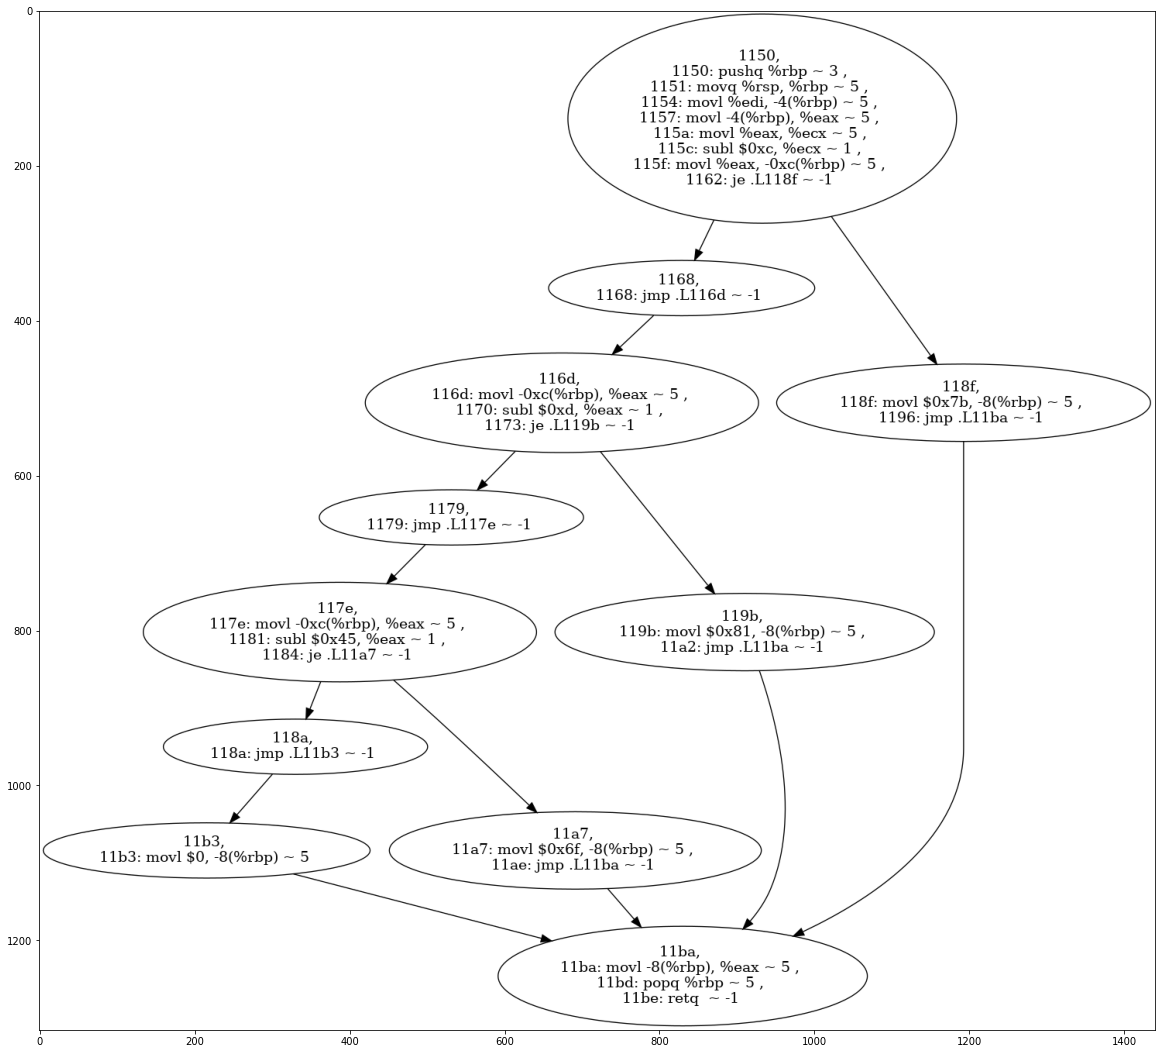

In [3]:
from rwtools.nemesis.nemesistool import NemesisInstrumentProgram
import subprocess 

tool = NemesisInstrumentProgram(input_binary, output_assembly)

func = tool.functions['multifork']
figs, axs = plt.subplots(1, figsize=(20,20))

axs.imshow(func.render_cfg())

[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3df0
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
multifork
main


CompletedProcess(args=['gcc', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/multifork/multifork_rw.s', '-o', '/home/gilles/git-repos/NemesisRetroWrite/retrowrite/rwtools/nemesis/test_programs/multifork/multifork_rw'], returncode=0)

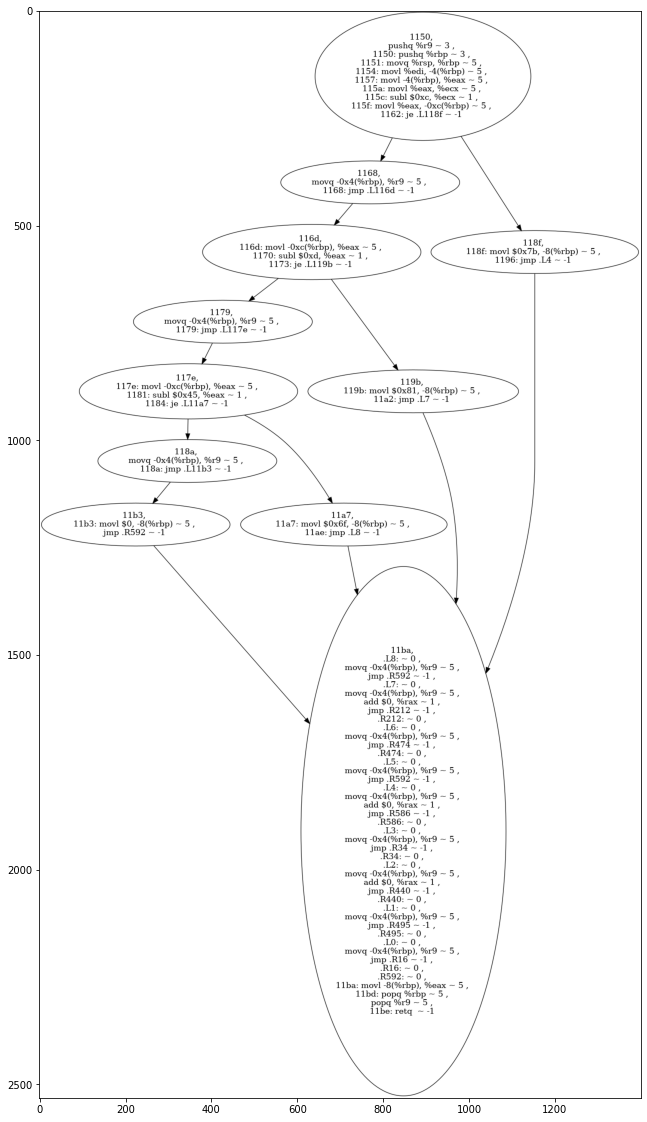

In [4]:
tool = NemesisInstrumentProgram(input_binary, output_assembly)
tool.instrument_program([1162, 1173, 1184])

figs, axs = plt.subplots(1, figsize=(20,20))
axs.imshow(tool.functions['multifork'].render_cfg())
tool.dump()

subprocess.run(["gcc", output_assembly, "-o", output_binary])


[*] Relocations for a section that's not loaded: .rela.dyn
[*] Relocations for a section that's not loaded: .rela.plt
[x] Could not replace value in .init_array
[x] Couldn't find valid section 3db8
[x] Couldn't find valid section 3fd8
[x] Couldn't find valid section 3fe0
[x] Couldn't find valid section 3fe8
[x] Couldn't find valid section 3ff0
[x] Couldn't find valid section 3ff8
multifork
main
no issues found


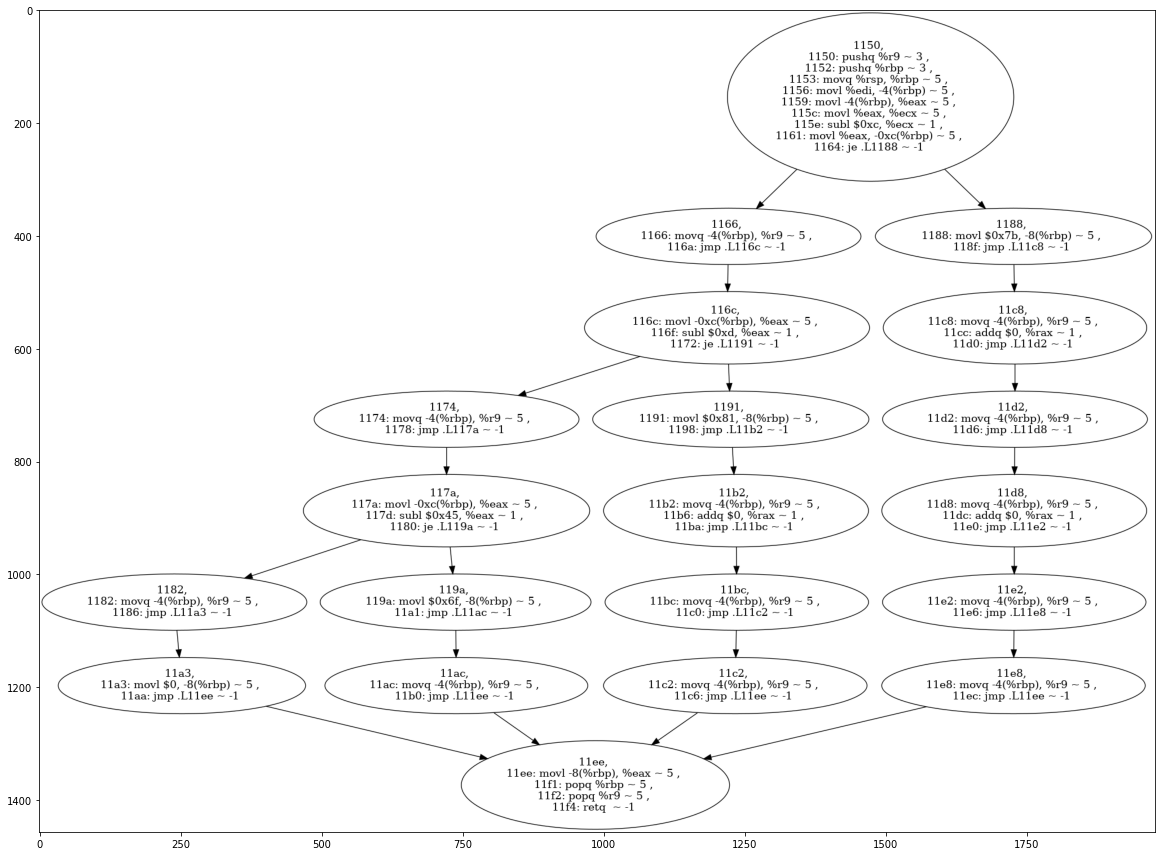

In [5]:
from rwtools.nemesis.evaluationtool import NemesisEvaluateProgram 
evaluation = NemesisEvaluateProgram(output_binary, "")

figs, axs = plt.subplots(1, figsize=(20,20))

evaluation.evaluate_program([1164])
axs.imshow(evaluation.functions['multifork'].render_cfg())


In [6]:



test_cases = []

with open(test_values, "r") as f: 
    for line in f:
        test_cases.append(line.strip().split(" "))

for test_case in test_cases: 
    expected = subprocess.run([input_binary, *test_case]).returncode
    result = subprocess.run([output_binary, *test_case]).returncode
    if expected != result:
        print("incorrect result on test with inputs", *test_case)
    else: 
        print("correct")

correct
correct
correct
correct
correct
correct
correct
